# 1. Inputs

The inputs are modelled by temperature and flow rate sources.
The sources can be represented by the weather (outdoor air temperature, solar radiation) or by schedules (indoor air temperature set-point or internal gains).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dm4bem

## 1.1 Start and end time

The simulation will be done from start_date to end_date indicated in the format MM-DD HH:MM:SS (month-day, hour:minute:second).

In [7]:
start_date = '01-01 00:00:00'
end_date = '01-07 00:00:00'

The weather data are for a typical meteorological year (TMY).

In [24]:
start_date = '2017-' + start_date
end_date = '2017-' + end_date
print(f'{start_date} \tstart date')
print(f'{end_date} \tend date')

2017-2000-01-01 00:00:00 	start date
2017-2000-01-07 00:00:00 	end date


## 1.2. Input data set

The input_data_set is a DataFrame which contains the values of the teperature and the flow-rate sources in time. In our case, the sources are (Figure 1):

- $T_o$ - outdoor air temperature, °C;
- $T_{i,sp}$ - setpoint of indoor air temperature, °C;
- $\Phi_i$ - solar radiation absorbed by the surface characterized by the node i, W; 
- $\dot{Q}_a$ - auxiliary heat gains (i.e., occupants, electrical devices, etc.), W;

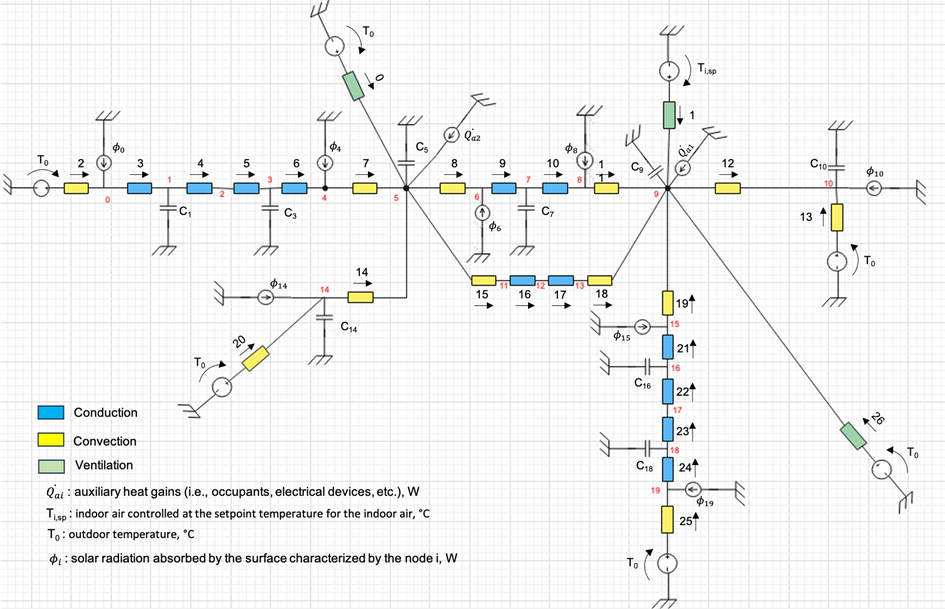
> Figure 1. Thermal circuit with temperature and flow-rate sources

The temperature and flow-rate sources are obtained from weather data ($T_o$, $\Phi_o$, $\Phi_i$, $\Phi_a$) and from schedules ($T_{i,sp}$, $\dot{Q}_i$).

#1.1 Weather: outdoor temperature and solar radiation

From the weather data, we select:
- hourly outdoor air temperature, °C;
- hourly solar [direct normal irradiance](https://en.m.wikipedia.org/wiki/Direct_insolation) (or beam radiation), W/m²;
- hourly solar diffuse horizontal irradiance (or [diffuse sky radiation](https://en.wikipedia.org/wiki/Diffuse_sky_radiation)), W/m²;

and delete the other data.

In [25]:
filename = 'FRA_AR_Lyon-Bron.AP.074800_TMYx.2004-2018.epw'
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data

In the index of the DataFrame, the year is set to 2000 by convention and the data is selected from start date to end date.

In [ ]:
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather.loc[start_date:end_date]
print(weather)

### 1.2.1. Outdoor temperature

In [28]:
To = weather['temp_air']
print(To)

2000-01-01 00:00:00+01:00     0.0
2000-01-01 01:00:00+01:00     2.0
2000-01-01 02:00:00+01:00     1.9
2000-01-01 03:00:00+01:00     1.8
2000-01-01 04:00:00+01:00     1.6
                             ... 
2000-12-31 19:00:00+01:00    12.9
2000-12-31 20:00:00+01:00    12.8
2000-12-31 21:00:00+01:00    12.7
2000-12-31 22:00:00+01:00    12.8
2000-12-31 23:00:00+01:00    13.1
Name: temp_air, Length: 8760, dtype: float64


### 1.2.2. Solar irradiance on the walls